In [1]:
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import numpy as np
import pandas as pd
import os

In [2]:
#поизучать!!!
def print_folder_statistics(path):
    d_image_sizes = {}
    for image_name in os.listdir(path):
        image = cv2.imread(os.path.join(path, image_name))
        d_image_sizes[image.shape] = d_image_sizes.get(image.shape, 0) + 1
        
    for size, count in d_image_sizes.items():
        print(f"shape: {size}\tcount: {count}")


print(f"Monet images:")
print_folder_statistics(MONET_PATH)
print("-" * 10)
print(f"Photo images:")
print_folder_statistics(PHOTO_PATH)
print("-" * 10)

Monet images:


NameError: name 'MONET_PATH' is not defined

In [6]:
os.listdir('../data')

['extra_data',
 'extra_images.csv',
 'train_images',
 'train_images.csv',
 'unlabeled',
 'unlabeled.csv']

In [7]:
path = '../data/'
train_images_csv = pd.read_csv(path + 'train_images.csv')

In [8]:
def get_image_path():
    return path + 'train_images/' + np.random.choice(train_images_csv['image_id'])

In [9]:
img_path = get_image_path()
img_path

'../data/train_images/3865023649.jpg'

In [10]:
def plot_simple_augmentation(image_path, transform):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    x = transform(image=img)["image"]
    plt.imshow(x)
    plt.axis("off")

    plt.show()
    
def plot_multiple_augmentation(image_path, transform):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(img)
    plt.axis("off")
    
    plt.subplot(2, 2, 2)
    x = transform(image=img)["image"]
    plt.imshow(x)
    plt.axis("off")
    
    plt.subplot(2, 2, 3)
    x = transform(image=img)["image"]
    plt.imshow(x)
    plt.axis("off")
    
    plt.subplot(2, 2, 4)
    x = transform(image=img)["image"]
    plt.imshow(x)
    plt.axis("off")

    plt.show()

# BLURE

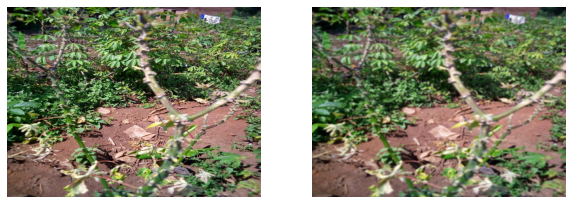

In [11]:
transform = A.Compose(
    [
        A.Blur(p=1.0, blur_limit=(5, 5)),
    ]
)

plot_simple_augmentation(img_path, transform)

# CLAHE

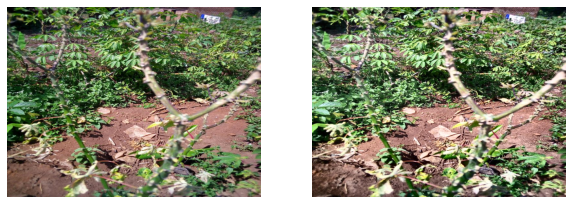

In [12]:
transform = A.CLAHE(p=1.0, clip_limit=(10, 10), tile_grid_size=(3, 3))

plot_simple_augmentation(img_path, transform)

# CenterCrop

In [13]:
transform = A.CenterCrop(p=1.0, height=512, width=512)

plot_simple_augmentation(img_path, transform)

# Crop

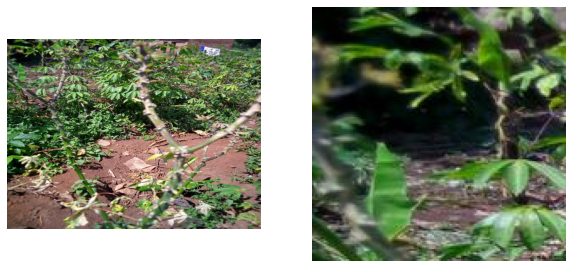

In [14]:
transform = A.Crop(p=1.0, x_min=0, y_min=0, x_max=150, y_max=150)

plot_simple_augmentation(img_path, transform)

# RandomCrop

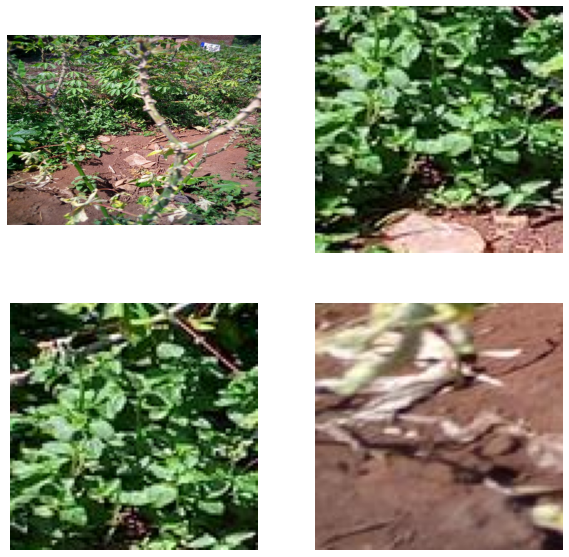

In [15]:
transform = A.RandomCrop(p=1.0, height=100, width=100)

plot_multiple_augmentation(img_path, transform)

# CutOut

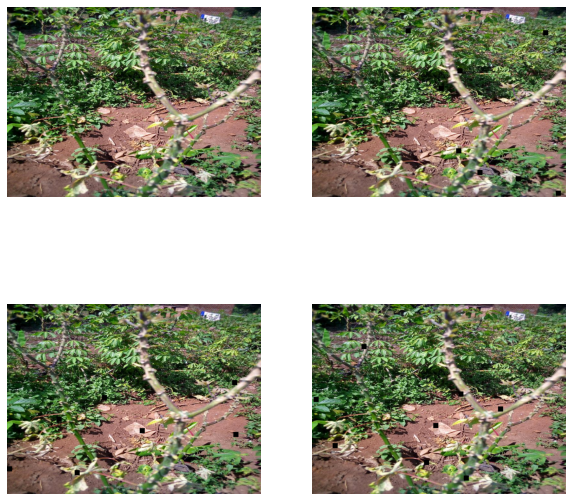

In [20]:
transform = A.Cutout(p=1.0, num_holes=8, max_h_size=16, max_w_size=16)

plot_multiple_augmentation(img_path, transform)

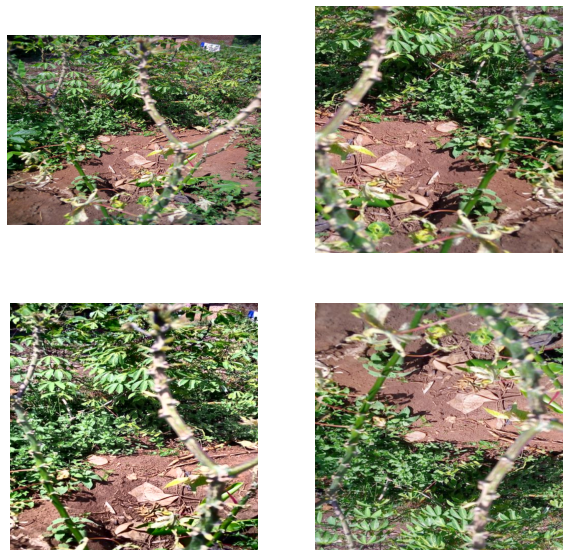

In [16]:
img_min_size = 600
min_size = 512
image_size = (512, 512)
transform = A.Compose([
        A.OneOf([A.RandomSizedCrop(min_max_height=(int(512 * 0.85), 512),
                          height=512,
                          width=512),
                A.Resize(image_size[0], image_size[1]),
                A.CenterCrop(image_size[0], image_size[1])
                ], p = 1.0),

        A.OneOf([
            A.RandomBrightnessContrast(brightness_limit=0.15,
                                       contrast_limit=0.5),
            A.RandomGamma(gamma_limit=(50, 150)),
            A.NoOp()
        ], p = 1.0),
        
        A.OneOf([A.CLAHE(p=0.5, clip_limit=(10, 10), tile_grid_size=(3, 3)),
                A.FancyPCA(alpha=0.4),
                A.NoOp(),
                ], p = 1.0),
        
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Flip(p = 0.5)
    ])

plot_multiple_augmentation(img_path, transform)

In [83]:
img = cv2.imread(img_path)

In [108]:
transform = A.Compose([
        A.OneOf([A.RandomSizedCrop(min_max_height=(int(512 * 0.85), 512),
                          height=512,
                          width=512),
#                 A.RandomSizedCrop(min_max_height=(int(img_min_size * 0.85), img_min_size),
#                           height=512,
#                           width=512, p = 1.0),
                A.Resize(image_size[0], image_size[1]),
                A.CenterCrop(image_size[0], image_size[1])
                ], p = 1.0),

        A.OneOf([
            A.RandomBrightnessContrast(brightness_limit=0.15,
                                       contrast_limit=0.5),
            A.RandomGamma(gamma_limit=(50, 150)),
            A.NoOp()
        ], p = 1.0),
        
        A.OneOf([A.CLAHE(p=0.5, clip_limit=(10, 10), tile_grid_size=(3, 3)),
                A.FancyPCA(alpha=0.4),
                A.NoOp(),
                ], p = 1.0),
        
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.5),
        A.Flip(p = 0.5)
    ])
transform(image=img)['image'].shape

(512, 512, 3)

In [90]:
transofrm = A.RandomSizedCrop(min_max_height=(int(600 * 0.85), 600),
                          height=225,
                          width=512, p = 1.0)
transform(image=img)['image'].shape

(512, 512, 3)

# RandomSizeCrop

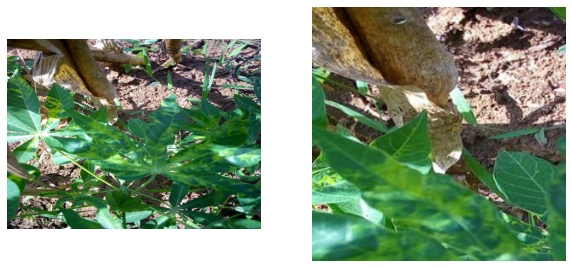

In [36]:
transform = A.RandomSizedCrop(min_max_height=(int(300 * 0.85), 300),
                          height=300,
                          width=300, p=1.0)

plot_simple_augmentation(img_path, transform)

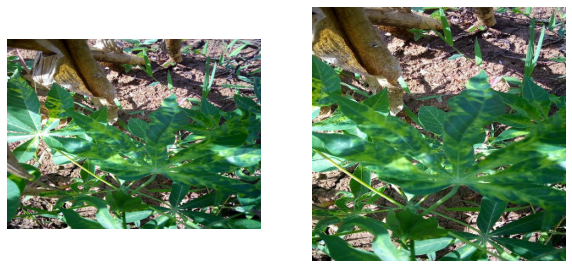

In [37]:
transform = A.RandomSizedCrop(min_max_height=(int(600 * 0.85), 600),
                          height=300,
                          width=300, p=1.0)

plot_simple_augmentation(img_path, transform)

# RandomBrightnessContrast

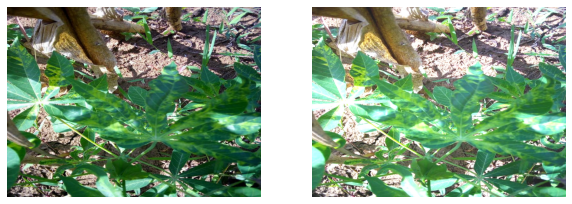

In [52]:
transform = A.RandomBrightnessContrast(brightness_limit=0.15,
                                       contrast_limit=0.5, p = 1.0)
plot_simple_augmentation(img_path, transform)

# RandomGamma

In [ ]:
transform = A.RandomGamma(gamma_limit=(50, 150))
plot_simple_augmentation(img_path, transform)

# FancyPCA

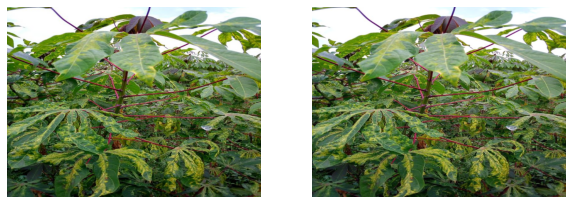

In [21]:
transform = A.FancyPCA(alpha=0.4, p=1.0)
img_path = get_image_path()
plot_simple_augmentation(img_path, transform)

In [ ]:
A.SnapMix